In [97]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression

# `BUSINESS PROBLEM-1`

In [98]:
loan = pd.read_csv("D:\LoansData.csv")


In [99]:
loan

,Amount.Requested,Amount.Funded.By.Investors,Interest.Rate,Loan.Length,Loan.Purpose,Debt.To.Income.Ratio,State,Home.Ownership,Monthly.Income,FICO.Range,Open.CREDIT.Lines,Revolving.CREDIT.Balance,Inquiries.in.the.Last.6.Months,Employment.Length
0,20000.0,20000.00,8.90%,36 months,debt_consolidation,14.90%,SC,MORTGAGE,6541.67,735-739,14.0,14272.0,2.0,< 1 year
1,19200.0,19200.00,12.12%,36 months,debt_consolidation,28.36%,TX,MORTGAGE,4583.33,715-719,12.0,11140.0,1.0,2 years
2,35000.0,35000.00,21.98%,60 months,debt_consolidation,23.81%,CA,MORTGAGE,11500.00,690-694,14.0,21977.0,1.0,2 years
3,10000.0,9975.00,9.99%,36 months,debt_consolidation,14.30%,KS,MORTGAGE,3833.33,695-699,10.0,9346.0,0.0,5 years
4,12000.0,12000.00,11.71%,36 months,credit_card,18.78%,NJ,RENT,3195.00,695-699,11.0,14469.0,0.0,9 years
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2495,30000.0,29950.00,16.77%,60 months,debt_consolidation,19.23%,NY,MORTGAGE,9250.00,705-709,15.0,45880.0,1.0,8 years
2496,16000.0,16000.00,14.09%,60 months,home_improvement,21.54%,MD,OWN,8903.25,740-744,18.0,18898.0,1.0,10+ years
2497,10000.0,10000.00,13.99%,36 months,debt_consolidation,4.89%,PA,MORTGAGE,2166.67,680-684,4.0,4544.0,0.0,10+ years
2498,6000.0,6000.00,12.42%,36 months,major_purchase,16.66%,NJ,RENT,3500.00,675-679,8.0,7753.0,0.0,5 years


# `Data Preparation`

In [100]:
loan.columns = loan.columns.str.replace('.', '_', regex=False)

In [101]:
loan

,Amount_Requested,Amount_Funded_By_Investors,Interest_Rate,Loan_Length,Loan_Purpose,Debt_To_Income_Ratio,State,Home_Ownership,Monthly_Income,FICO_Range,Open_CREDIT_Lines,Revolving_CREDIT_Balance,Inquiries_in_the_Last_6_Months,Employment_Length
0,20000.0,20000.00,8.90%,36 months,debt_consolidation,14.90%,SC,MORTGAGE,6541.67,735-739,14.0,14272.0,2.0,< 1 year
1,19200.0,19200.00,12.12%,36 months,debt_consolidation,28.36%,TX,MORTGAGE,4583.33,715-719,12.0,11140.0,1.0,2 years
2,35000.0,35000.00,21.98%,60 months,debt_consolidation,23.81%,CA,MORTGAGE,11500.00,690-694,14.0,21977.0,1.0,2 years
3,10000.0,9975.00,9.99%,36 months,debt_consolidation,14.30%,KS,MORTGAGE,3833.33,695-699,10.0,9346.0,0.0,5 years
4,12000.0,12000.00,11.71%,36 months,credit_card,18.78%,NJ,RENT,3195.00,695-699,11.0,14469.0,0.0,9 years
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2495,30000.0,29950.00,16.77%,60 months,debt_consolidation,19.23%,NY,MORTGAGE,9250.00,705-709,15.0,45880.0,1.0,8 years
2496,16000.0,16000.00,14.09%,60 months,home_improvement,21.54%,MD,OWN,8903.25,740-744,18.0,18898.0,1.0,10+ years
2497,10000.0,10000.00,13.99%,36 months,debt_consolidation,4.89%,PA,MORTGAGE,2166.67,680-684,4.0,4544.0,0.0,10+ years
2498,6000.0,6000.00,12.42%,36 months,major_purchase,16.66%,NJ,RENT,3500.00,675-679,8.0,7753.0,0.0,5 years


In [102]:
loan.Interest_Rate=loan.Interest_Rate.str.replace('%',' ').apply(pd.to_numeric)

In [103]:
loan.Debt_To_Income_Ratio=loan.Debt_To_Income_Ratio.str.replace('%',' ').apply(pd.to_numeric)

In [104]:
loan.dtypes

Amount_Requested                  float64
Amount_Funded_By_Investors        float64
Interest_Rate                     float64
Loan_Length                        object
Loan_Purpose                       object
Debt_To_Income_Ratio              float64
State                              object
Home_Ownership                     object
Monthly_Income                    float64
FICO_Range                         object
Open_CREDIT_Lines                 float64
Revolving_CREDIT_Balance          float64
Inquiries_in_the_Last_6_Months    float64
Employment_Length                  object
dtype: object

In [105]:
loan.describe(percentiles=np.arange(0,1,0.1)).T

,count,mean,std,min,0%,10%,20%,30%,40%,50%,60%,70%,80%,90%,max
Amount_Requested,2499.0,12405.462185,7802.933666,1000.00,1000.00,4000.000,5440.000,7170.00,9000.000,10000.00,12000.000,15000.00,19200.000,24000.000,35000.00
Amount_Funded_By_Investors,2499.0,12002.374186,7746.767348,-0.01,-0.01,3600.000,5000.000,6975.00,8799.232,10000.00,12000.000,15000.00,18050.796,23950.000,35000.00
Interest_Rate,2498.0,13.065388,4.177201,5.42,5.42,7.620,8.900,10.74,12.120,13.11,14.090,15.27,16.490,18.640,24.89
Debt_To_Income_Ratio,2499.0,15.380420,7.505052,0.00,0.00,5.308,8.516,11.03,13.182,15.32,17.306,19.47,21.880,25.014,34.91
Monthly_Income,2499.0,5688.931321,3963.118185,588.50,588.50,2600.000,3250.000,3750.00,4333.330,5000.00,5441.484,6250.00,7500.000,9297.330,102750.00
Open_CREDIT_Lines,2497.0,10.072887,4.507416,2.00,2.00,5.000,6.000,7.00,8.000,9.00,11.000,12.00,14.000,16.000,38.00
Revolving_CREDIT_Balance,2497.0,15223.184622,18281.015258,0.00,0.00,2298.800,4641.600,6560.80,8575.800,10948.00,13482.000,16651.60,21510.800,30047.000,270800.00
Inquiries_in_the_Last_6_Months,2497.0,0.906688,1.231149,0.00,0.00,0.000,0.000,0.00,0.000,0.00,1.000,1.00,2.000,3.000,9.00


In [106]:
loan=loan.drop(columns='Employment_Length')

In [107]:
loan.isna().sum()

Amount_Requested                  1
Amount_Funded_By_Investors        1
Interest_Rate                     2
Loan_Length                       0
Loan_Purpose                      0
Debt_To_Income_Ratio              1
State                             0
Home_Ownership                    1
Monthly_Income                    1
FICO_Range                        2
Open_CREDIT_Lines                 3
Revolving_CREDIT_Balance          3
Inquiries_in_the_Last_6_Months    3
dtype: int64

In [108]:
loan.dropna(inplace=True)

In [109]:
loan['FICO_Score'] = (
    (pd.to_numeric(loan['FICO_Range'].str[0:3], errors='coerce').fillna(0).astype(int)) +
    (pd.to_numeric(loan['FICO_Range'].str[4:], errors='coerce').fillna(0).astype(int))
) / 2


# a. Intrest rate is varied for different loan amounts (Less intrest charged for high loan amount


In [110]:
stats.pearsonr(loan.Interest_Rate,loan.Amount_Funded_By_Investors)

PearsonRResult(statistic=0.3358194064278588, pvalue=1.1396807200527619e-66)

Hypothesis Testing Interpretation :

p-value = 1.1396807200473959e-66 which is less than 0.05 , so we can reject null hypothesis and accept alternate hypothesis. With 95 percent confidence interval, we can say that
Interest rate is varied for different loan amounts.

# b. Loan length is directly effecting intrest rate.

In [111]:
loan.Loan_Length.value_counts()
length_36months=loan.query('Loan_Length=="36 months"').Interest_Rate
length_60months=loan.query('Loan_Length=="60 months"').Interest_Rate


In [112]:
length_36months.mean()


12.128907779495107

In [113]:
length_60months.mean()

16.407463503649634

In [114]:
stats.ttest_ind(length_60months,length_36months)

Ttest_indResult(statistic=23.37963620691779, pvalue=1.9132344351585912e-109)

Hypothesis Testing Interpretation :

p-value = 1.9132344351585912e-109,which is less than 0.05 , so we can reject null hypothesis and accept alternate hypothesis.
With 95 percent confidence interval,we can say that  Loan length is directly effecting interest rate.

# c. Interest rate varies for different purpose of loans

In [115]:
debt_consolidation=loan.query('Loan_Purpose=="debt_consolidation"').Interest_Rate
credit_card=loan.query('Loan_Purpose=="credit_card"').Interest_Rate
other=loan.query('Loan_Purpose=="other"').Interest_Rate
home_improvement=loan.query('Loan_Purpose=="home_improvement"').Interest_Rate
major_purchase=loan.query('Loan_Purpose=="major_purchase"').Interest_Rate
small_business=loan.query('Loan_Purpose=="small_business"').Interest_Rate            
car=loan.query('Loan_Purpose=="car"').Interest_Rate
wedding=loan.query('Loan_Purpose=="wedding"').Interest_Rate
medical=loan.query('Loan_Purpose=="medical"').Interest_Rate
moving=loan.query('Loan_Purpose=="moving"').Interest_Rate
vacation=loan.query('Loan_Purpose=="vacation"').Interest_Rate
house=loan.query('Loan_Purpose=="house"').Interest_Rate
educational=loan.query('Loan_Purpose=="educational"').Interest_Rate
renewable_energy=loan.query('Loan_Purpose=="renewable_energy"').Interest_Rate          

In [116]:
stats.f_oneway(debt_consolidation,credit_card,other,home_improvement,major_purchase,small_business,car,wedding,medical,moving,vacation,house,educational,renewable_energy)

F_onewayResult(statistic=7.487175499510107, pvalue=1.1346364693350775e-14)

Hypothesis Testing Interpretation :

p_value=1.1346364693350775e-14 which is less than 0.05 , so we can reject null hypothesis and accept alternate hypothesis. 
With 95 percent confidence interval,we can say that Interest rate varies for different purpose of loans.

# d. There is relationship between FICO scores and Home Ownership. It means that, People 
## with owning home will have high FICO scores.

In [117]:
mortage=loan.query('Home_Ownership=="MORTGAGE"').FICO_Score
rent=loan.query('Home_Ownership=="RENT"').FICO_Score
own=loan.query('Home_Ownership=="OWN"').FICO_Score            
other=loan.query('Home_Ownership=="OTHER"').FICO_Score

In [118]:
stats.f_oneway(mortage,rent,own,other)

F_onewayResult(statistic=23.067768208374645, pvalue=1.001016973422469e-14)

Hypothesis Testing Interpretation :

p_value=1.001016973422469e-14 which is less than 0.05 , so we can reject null hypothesis and accept alternate hypothesis. 
With 95 percent confidence interval,we can say that There is relationship between FICO scores and Home Ownership.

# `Business Problem-2`

In [119]:
## importing csv file

In [120]:
price_quotes = pd.read_csv("D:\Price_Quotes.csv")

In [121]:
price_quotes.head(5)

,Order_Number,Barry_Price,Mary_Price
0,1,126,114
1,2,110,118
2,3,138,114
3,4,142,111
4,5,146,129


In [122]:
price_quotes.dtypes

Order_Number    int64
Barry_Price     int64
Mary_Price      int64
dtype: object

In [123]:
## finding null value
price_quotes.isna().sum()

Order_Number    0
Barry_Price     0
Mary_Price      0
dtype: int64

# BUSINESS PROBLEM: We would like to assess if there is any difference in the average price quotes provided by Mary and Barry.

In [124]:
price_quotes.Barry_Price.mean()

124.33333333333333

In [125]:
price_quotes.Mary_Price.mean()

114.75

In [126]:
stats.ttest_ind(price_quotes.Barry_Price,price_quotes.Mary_Price)

Ttest_indResult(statistic=1.4147436739281787, pvalue=0.17114226132118285)

Hypothesis Testing Interpretation :

pvalue=0.17114226132118285 which is greater than 0.05, we cannot reject null hypothesis.
With 95 percent confidence interval,we cannot say that there is difference in the average price quotes provided by Mary and Barry with the help of this data .


# `Business Problem -3`

In [127]:
## importing csv file
treatment_facility = pd.read_csv("D:\Treatment_Facility.csv")


In [128]:
treatment_facility.head(5)

,Month,Reengineer,Employee_Turnover,VAR4,VAR5
0,1,Prior,0.0000,24.390244,42.682927
1,2,Prior,6.0606,19.354839,25.806452
2,3,Prior,12.1212,35.087719,146.198830
3,4,Prior,3.3333,18.404908,110.429448
4,5,Prior,12.9032,17.964072,23.952096


In [129]:
treatment_facility.isna().sum()

Month                0
Reengineer           0
Employee_Turnover    0
VAR4                 0
VAR5                 0
dtype: int64

In [130]:
## renaming columns:
treatment_facility.rename(columns={'VAR4':"TRFF",'VAR5':"CI"},inplace =True)
treatment_facility

,Month,Reengineer,Employee_Turnover,TRFF,CI
0,1,Prior,0.0000,24.390244,42.682927
1,2,Prior,6.0606,19.354839,25.806452
2,3,Prior,12.1212,35.087719,146.198830
3,4,Prior,3.3333,18.404908,110.429448
4,5,Prior,12.9032,17.964072,23.952096
5,6,Prior,9.6774,41.176471,47.058824
6,7,Prior,11.7647,13.422819,0.000000
7,8,Prior,11.4286,31.250000,25.000000
8,9,Prior,23.0769,17.241379,132.183908
9,10,Prior,15.0000,16.574586,16.574586


# `BUSINESS PROBLEM: Determine what effect,`

# a.) is there any effect in staff turnover

In [131]:
prior_turnover=treatment_facility.query('Reengineer=="Prior"').Employee_Turnover
post_turnover=treatment_facility.query('Reengineer=="Post"').Employee_Turnover

In [132]:
stats.ttest_ind(prior_turnover,post_turnover)

Ttest_indResult(statistic=-1.770306704753604, pvalue=0.09361109345535304)

Hypothesis Testing interpretation :

pvalue=0.09361109345535304 which is greater than 0.05, we cannot reject null hypothesis. With 95 percent confidence interval,we cannot say that there is 
effect in staff turnover with this data.


# b.) if the reengineering effort changed the critical incidence rate.

In [133]:
prior_CI=treatment_facility.query('Reengineer=="Prior"').CI
post_CI=treatment_facility.query('Reengineer=="Post"').CI

In [134]:
stats.ttest_ind(prior_CI,post_CI)

Ttest_indResult(statistic=1.627914425352865, pvalue=0.12091989189884148)

Hypothesis Testing Interpretation:
    
pvalue=0.12091989189884149 which is greater than 0.05, we cannot reject null hypothesis.
With 95 percent confidence interval,we cannot say that the  reengineering effort 
changed the critical incidence rate wuth this data.

# `Business Problem -4`

In [135]:
## importing csv file
priority_assessment = pd.read_csv("D:\Priority_Assessment.csv")


In [136]:
priority_assessment.head(5)

,Days,Priority
0,3.3,High
1,7.9,Medium
2,0.3,High
3,0.7,Medium
4,8.6,Medium


In [137]:
priority_assessment.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 642 entries, 0 to 641
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Days      642 non-null    float64
 1   Priority  642 non-null    object 
dtypes: float64(1), object(1)
memory usage: 10.2+ KB


In [138]:
priority_assessment.isna().sum()

Days        0
Priority    0
dtype: int64

# If the system is working, then high priority jobs, on average, should be completed more quickly than medium priority jobs, and medium priority jobs should be completed more quickly than low priority jobs

In [139]:
High=priority_assessment.query('Priority=="High"').Days
Medium=priority_assessment.query('Priority=="Medium"').Days
Low=priority_assessment.query('Priority=="Low"').Days

In [140]:
stats.f_oneway(High,Medium,Low)

F_onewayResult(statistic=1.812311010076072, pvalue=0.16411459461716182)

Hypothesis Testing Interpretation:

pvalue=0.16411459461716182 which is greater than 0.05, we cannot reject null hypothesis.
With 95 percent confidence interval,we cannot say that that  high priority jobs are completed more quickly than medium priority jobs, and medium priority jobs are  completed more quickly than
low priority jobs with the help of this data.

#    `Business Problem-5`

In [141]:
## importing csv file
films = pd.read_csv("D:\Films.csv")


In [142]:
films.head(5)

,_rowstate_,Movie,Gender,Marital_Status,Sinage,Parking,Clean,Overall,Age,Income,Hear_About
0,0,Ferris Buellers Day Off,Female,Married,2.0,2.0,2.0,2.0,3.0,1.0,5
1,0,Ferris Buellers Day Off,Female,Single,1.0,1.0,1.0,1.0,2.0,1.0,5
2,0,Ferris Buellers Day Off,Male,Married,2.0,4.0,3.0,2.0,4.0,1.0,5
3,0,Ferris Buellers Day Off,Female,Married,1.0,3.0,2.0,2.0,4.0,1.0,5
4,0,Ferris Buellers Day Off,Female,Married,1.0,1.0,1.0,1.0,3.0,3.0,1


In [143]:
films.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 330 entries, 0 to 329
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   _rowstate_      330 non-null    int64  
 1   Movie           330 non-null    object 
 2   Gender          330 non-null    object 
 3   Marital_Status  328 non-null    object 
 4   Sinage          328 non-null    float64
 5   Parking         328 non-null    float64
 6   Clean           327 non-null    float64
 7   Overall         328 non-null    float64
 8   Age             328 non-null    float64
 9   Income          314 non-null    float64
 10  Hear_About      323 non-null    object 
dtypes: float64(6), int64(1), object(4)
memory usage: 28.5+ KB


In [144]:
films.isna().sum()

_rowstate_         0
Movie              0
Gender             0
Marital_Status     2
Sinage             2
Parking            2
Clean              3
Overall            2
Age                2
Income            16
Hear_About         7
dtype: int64

# Data Prepration

In [145]:
films.Gender.value_counts()

2         194
1         104
Female     19
Male       13
Name: Gender, dtype: int64

In [146]:
films.Gender=np.where((films.Gender == 'Male') | (films.Gender == '1'),"Male","Female")

In [147]:
films.Marital_Status.value_counts()

2          208
1           88
Single      18
Married     12
Slngle       2
Name: Marital_Status, dtype: int64

In [148]:
films.Marital_Status=np.where((films.Marital_Status=='1') | (films.Marital_Status=='Married') ,"Married","Single" )

In [149]:
films.describe().T

,count,mean,std,min,25%,50%,75%,max
_rowstate_,330.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
Sinage,328.0,1.884146,0.830603,1.0,1.0,2.0,2.0,5.0
Parking,328.0,1.756098,0.798484,1.0,1.0,2.0,2.0,5.0
Clean,327.0,1.681957,0.728313,1.0,1.0,2.0,2.0,5.0
Overall,328.0,1.618902,0.689286,1.0,1.0,2.0,2.0,5.0
Age,328.0,2.338415,0.666902,1.0,2.0,2.0,3.0,4.0
Income,314.0,1.834395,0.844808,1.0,1.0,2.0,3.0,3.0


In [150]:
for i in films.columns:
    films[i]=films[i].fillna(films[i].mode()[0])  

In [151]:
films.isna().sum()

_rowstate_        0
Movie             0
Gender            0
Marital_Status    0
Sinage            0
Parking           0
Clean             0
Overall           0
Age               0
Income            0
Hear_About        0
dtype: int64

# a.) What is the overall level of customer satisfaction?

In [152]:
mean=films.Overall.mean()

In [153]:
std=films.Overall.std()

In [154]:
SE=std/(np.sqrt(films.shape[0]))

with 95% confidence levels,the overall level of customer 
satisfaction will be in the range (1.5469994901816928,1.6954247522425494)

# b.) What factors are linked to satisfaction?

In [155]:
# factor 1 = Movie

In [156]:
films.Movie.value_counts()

Willy Wonka                161
Ferris Buellers Day Off    137
Old School                  32
Name: Movie, dtype: int64

In [157]:
Willy_Wonka=films.query('Movie=="Willy Wonka"').Overall
Ferris_Buellers_Day_Off=films.query('Movie=="Ferris Buellers Day Off"').Overall
Old_School=films.query('Movie=="Old School"').Overall

In [158]:
stats.f_oneway(Willy_Wonka,Ferris_Buellers_Day_Off,Old_School)

F_onewayResult(statistic=1.335243752886233, pvalue=0.2645245972839759)

pvalue=0.2645245972839759 which is greater than 0.05, we cannot reject null hypothesis .
With 95 percent confidence interval,we cannot say that Movie is a factor linked to satisfaction with this data.

In [159]:
# factor 2 = Gender

In [160]:
Male=films.query('Gender=="Male"').Overall
Female=films.query('Gender=="Female"').Overall

In [161]:
stats.ttest_ind(Male,Female)

Ttest_indResult(statistic=1.393621669674226, pvalue=0.16437541932112798)

pvalue=0.1643754193211279 which is greater than 0.05,so, we cannot reject null hypothesis .
With 95 percent confidence interval,we cannot say that Gender is a factor linked to satisfaction with this data.

In [162]:
# factor 3 = Marital_Status

In [163]:
Married=films.query('Marital_Status=="Married"').Overall
Single=films.query('Marital_Status=="Single"').Overall

In [164]:
stats.ttest_ind(Single,Married)

Ttest_indResult(statistic=0.7171640309514444, pvalue=0.47378328196635067)

pvalue=0.47378328196635067,which is greater than 0.05,so, we cannot reject null hypothesis .
With 95 percent confidence interval,we cannot say that Marital_status is a factor linked to satisfaction with this data.

In [165]:
# factor 4 = Sinage

In [166]:
films.Sinage.value_counts()

2.0    158
1.0    113
3.0     48
4.0      6
5.0      5
Name: Sinage, dtype: int64

In [167]:
stats.pearsonr(films.Sinage,films.Overall)

PearsonRResult(statistic=0.3821028042239567, pvalue=6.501065434766993e-13)

pvalue=6.501065434766499e-13,,which is less than 0.05,we can reject null hypothesis .
With 95 percent confidence interval,we can say that Sinage is a factor linked to satisfaction with this data.

In [168]:
# factor 5 = Parking

In [169]:
stats.pearsonr(films.Parking,films.Overall)

PearsonRResult(statistic=0.5144289487855271, pvalue=1.0840276087790176e-23)

pvalue=1.0840276087789895e-23 ,,which is less than 0.05,so, we can reject null hypothesis .
With 95 percent confidence interval,we can say that Parking is a factor linked to satisfaction with this data.

In [170]:
# factor 6 = Clean

In [171]:
stats.pearsonr(films.Clean,films.Overall)

PearsonRResult(statistic=0.35082227890709217, pvalue=5.4375500074401733e-11)

pvalue=5.437550007439627e-11 ,,which is less than 0.05,so, we can reject null hypothesis .
With 95 percent confidence interval,we can say that Clean is a factor linked to satisfaction with this data.

In [172]:
# factor 7 = Age

In [173]:
films.Age.value_counts()

2.0    177
3.0    117
1.0     26
4.0     10
Name: Age, dtype: int64

In [174]:
one=films.query('Age==1').Overall
two=films.query('Age==2').Overall
three=films.query('Age==3').Overall
four=films.query('Age==4').Overall

In [175]:
one.mean()

1.5384615384615385

In [176]:
two.mean()

1.6779661016949152

In [177]:
three.mean()

1.547008547008547

In [178]:
four.mean()

1.7

In [179]:
stats.f_oneway(one,two,three,four)

F_onewayResult(statistic=1.0249927945692117, pvalue=0.3816737451872579)

pvalue=0.3816737451872579,which is greater than 0.05,so, we cannot reject null hypothesis .
With 95 percent confidence interval,we cannot say that Age is a factor linked to satisfaction with this data.

In [180]:
# factor 8= Income

In [181]:
films.Income.value_counts()

1.0    158
3.0     90
2.0     82
Name: Income, dtype: int64

In [182]:
income1=films.query('Income==1').Overall
income2=films.query('Income==2').Overall
income3=films.query('Income==3').Overall


In [183]:
stats.f_oneway(income1,income2,income3)

F_onewayResult(statistic=0.16488481054397225, pvalue=0.8480618362664597)

pvalue=0.8480618362664597,which is greater than 0.05,so, we cannot reject null hypothesis .
With 95 percent confidence interval,we cannot say that Income is a factor linked to satisfaction with this data.

In [184]:
# factor 9 = Hear_About

In [185]:
films.Hear_About.value_counts()

5      233
4       41
1       22
3       14
2       12
2,5      2
3,4      2
4,5      1
1,5      1
5,4      1
3,5      1
Name: Hear_About, dtype: int64

In [186]:
Hear_About_5=films.query('Hear_About=="5"').Overall
Hear_About_4=films.query('Hear_About=="4"').Overall
Hear_About_3=films.query('Hear_About=="3"').Overall
Hear_About_2=films.query('Hear_About=="2"').Overall
Hear_About_1=films.query('Hear_About=="1"').Overall
Hear_About_2_5=films.query('Hear_About=="2,5"').Overall
Hear_About_3_4=films.query('Hear_About=="3,4"').Overall
Hear_About_4_5=films.query('Hear_About=="4,5"').Overall
Hear_About_1_5=films.query('Hear_About=="1,5"').Overall
Hear_About_5_4=films.query('Hear_About=="5,4"').Overall
Hear_About_3_5=films.query('Hear_About=="3,5"').Overall

In [187]:
stats.f_oneway(Hear_About_5,Hear_About_4,Hear_About_3,Hear_About_2,Hear_About_1,Hear_About_2_5,Hear_About_3_4,Hear_About_4_5,Hear_About_1_5,Hear_About_5_4,Hear_About_3_5)

F_onewayResult(statistic=1.457397539085138, pvalue=0.15433478299883888)

pvalue=0.15433478299883888,which is greater than 0.05,so, we cannot reject null hypothesis .
With 95 percent confidence interval,we cannot say that Hear_about is a factor linked to satisfaction with this data.

So from above hypothesis prediction , sinage,parking and clean are factors linked to satisfaction

# c.) What is the demographic profile of Film on the Rocks patrons?

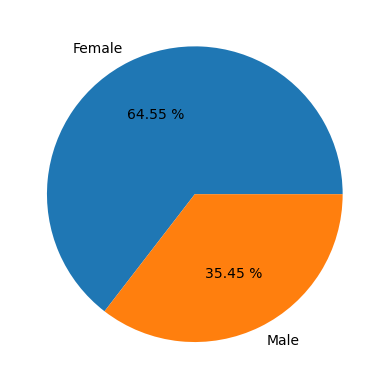

In [188]:
gender=(((films.Gender.value_counts())/(films.shape[0])*100)).reset_index().set_index('index')
plt.pie(gender.Gender,labels=gender.index,autopct='%0.2f %%')
plt.show()


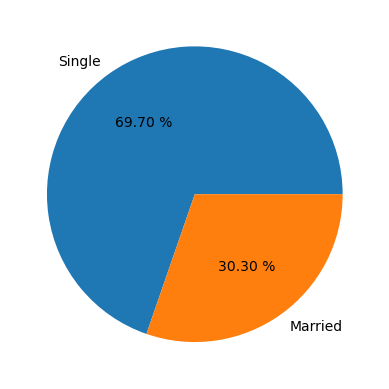

In [189]:
marital_status=(((films.Marital_Status.value_counts())/(films.shape[0])*100)).reset_index().set_index('index')
plt.pie(marital_status.Marital_Status,labels=marital_status.index,autopct='%0.2f %%')
plt.show()

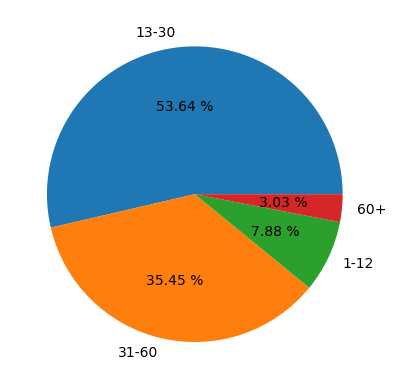

In [190]:
age=(((films.Age.value_counts())/(films.shape[0])*100)).reset_index().set_index('index')
plt.pie(age.Age,labels=['13-30','31-60','1-12','60+'],autopct='%0.2f %%')
plt.show()

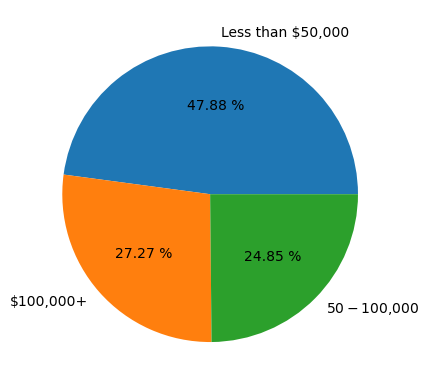

In [191]:
income=(((films.Income.value_counts())/(films.shape[0])*100)).reset_index().set_index('index')
plt.pie(income.Income,labels=['Less than $50,000','$100,000+','$50-$100,000'],autopct='%0.2f %%')
plt.show()

# d.) In what media outlet(s) should the film series be advertised?

In [192]:
films.groupby('Hear_About').Hear_About.count().sort_values(ascending = False).head(3)

Hear_About
5    233
4     41
1     22
Name: Hear_About, dtype: int64

In [ ]:
The film series should be advertised by Word of mouth